In [5]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# Machine Learning & Reinforcement Learning 
## Session 07b - Dimentionality Reduction

<img src='../../../prasami_images/prasami_color_tutorials_small.png' style = 'width:400px;' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>

## Reference:
[Singular Value Decomposition (SVD) tutorial](https://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm)

In [6]:
###------------------
### Import statements
###------------------

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import offsetbox
import matplotlib.patheffects as PathEffects

import scipy.linalg

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [7]:
# Some global parameters
inpDir = '../../../input'
outDir = '../output'
moduleDir = 'machine_learning' # set location of inputs for this module

RANDOM_STATE = 24

np.random.seed(RANDOM_STATE) # CAUTION: REMOVE BEFORE ROLLOUT


# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

CMAP = plt.cm.brg
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

plt.rcParams.update(params)

In [8]:
df = pd.read_csv(os.path.join(inpDir, moduleDir, 'demo_ratings.csv'))

In [9]:
df.head()

,user,movie,rating,movie_id,user_id
0,Aakash,MIB,5,1,1
1,Aakash,Star Trek,3,2,1
2,Aakash,Ace Ventura,0,3,1
3,Aakash,Breaveheart,2,4,1
4,Aakash,Titanic,2,5,1


In [10]:
df = df.drop(['user', 'movie'], axis = 1)

df.head()

,rating,movie_id,user_id
0,5,1,1
1,3,2,1
2,0,3,1
3,2,4,1
4,2,5,1


In [11]:
df_pivot = pd.pivot_table(df, index = 'user_id', columns = 'movie_id', values = 'rating').astype(np.float64)

df_pivot

movie_id,1,2,3,4,5,6
user_id,,,,,,
1,5.0,3.0,0.0,2.0,2.0,2.0
2,4.0,3.0,4.0,0.0,3.0,3.0
3,3.0,2.0,5.0,2.0,1.0,1.0
4,3.0,5.0,3.0,0.0,1.0,1.0
5,3.0,3.0,3.0,2.0,4.0,5.0
6,2.0,3.0,2.0,3.0,5.0,5.0


In [12]:
df_pivot.to_numpy()

array([[5., 3., 0., 2., 2., 2.],
       [4., 3., 4., 0., 3., 3.],
       [3., 2., 5., 2., 1., 1.],
       [3., 5., 3., 0., 1., 1.],
       [3., 3., 3., 2., 4., 5.],
       [2., 3., 2., 3., 5., 5.]])

## SVD - Singular Value Decomposition
- Data driven generalization of Fourier Transform (FFT).
    - Historically we used to to mathematical transformations to physical system
- SVDs are tailored to specifically problems.
- Google Page Rank uses it. Facial recognition uses it and also used in recommender systems
- Its based on simple and interpretable models.

We can have a number of images (150 x 150 px) and change it to a one row of 22500 columns and thus I can construct a X matrix thousands of images each occupying one row.

SVD will allow us to decompose into three matrices U, $\Sigma$ and $V^{T}$. Lets represent them in the code by U, S, and $V^{T}$.

$
\begin{aligned}
X &= \begin{bmatrix} x_1^{(1)} & x_2^{(1)} & x_3^{(1)} & ... & x_n^{(1)}\\ 
x_1^{(2)} & x_2^{(2)} & x_3^{(2)} & ... & x_n^{(2)}\\
x_1^{(...)} & x_2^{(...)} & x_3^{(...)} & ... & x_n^{(...)}\\
x_1^{(m)} & x_2^{(m)} & x_3^{(m)} & ... & x_n^{(m)}\end{bmatrix}_{ shape = m x n}\\
\end{aligned}
$

X = U x $\Sigma$ x $V^{T}$

X = `Left singular vector` x `Singular Values` x `Right singular vector`

V represents mixtures each of the faces used to create a face.

$
\begin{aligned}
U &= \begin{bmatrix} u_1^{(1)} & u_2^{(1)} & u_3^{(1)} & ... & u_m^{(1)}\\ 
u_1^{(2)} & u_2^{(2)} & u_3^{(2)} & ... & u_m^{(2)}\\
u_1^{(...)} & u_2^{(...)} & u_3^{(...)} & ... & u_m^{(...)}\\
u_1^{(m)} & u_2^{(m)} & u_3^{(m)} & ... & u_m^{(m)}\end{bmatrix}_{ shape  = m x m}\\
\end{aligned}
$

Us are eigenvalues and hierarchically arranged
$\Sigma$ is diagonal and again hierarchically arranged.

$
\begin{aligned}
\Sigma &= \begin{bmatrix} s_1^{(1)} & 0 & 0 & ... & 0\\ 
0 & s_2^{(2)} & 0 & ... & 0\\
... & ... & ... & ... & ...\\
0 & 0 & 0 & ... & n^{(n)}\\
0 & 0 & 0 & ... & 0\\\end{bmatrix}_{ m x n}\\
\end{aligned}
$

$
\begin{aligned}
V &= \begin{bmatrix} v_1^{(1)} & v_2^{(1)} & v_3^{(1)} & ... & v_n^{(1)}\\ 
v_1^{(2)} & v_2^{(2)} & v_3^{(2)} & ... & v_n^{(2)}\\
v_1^{(...)} & v_2^{(...)} & v_3^{(...)} & ... & v_n^{(...)}\\
v_1^{(n)} & v_2^{(n)} & v_3^{(n)} & ... & v_n^{(n)}\end{bmatrix}_{ n x n}^{T}\\
\end{aligned}
$

Very easily computable as shown below:

If we expand the SDV equation. We get a simple equation as $\Sigma$ is a diagonal matrix. Multiplication of U with $\Sigma$ will give simple rows and hence we can write:

$X = s_1 \circ u_1 \circ v_1^T + s_2 \circ u_2 \circ v_2^T  + s_3 \circ u_3 \circ v_3^T + ... + s_n \circ u_n \circ v_n^T + 0$. Rest of the values will be zero as $\Sigma$ has zeros

In [13]:
U, S, VT = scipy.linalg.svd(df_pivot.to_numpy())

Sn = S.sum()
print (Sn)

31.362050761197608


In [14]:
pd.DataFrame(U)

,0,1,2,3,4,5
0,-0.345135,-0.003415,0.838692,0.415136,0.071363,0.005900
1,-0.437510,0.221448,-0.142335,-0.208794,0.752265,0.360262
2,-0.332251,0.463178,-0.437365,0.652280,-0.240693,0.019631
3,-0.337772,0.539186,0.194301,-0.590131,-0.453389,-0.060156
4,-0.489079,-0.306503,-0.170791,-0.075006,0.128391,-0.784588
5,-0.475171,-0.593085,-0.134633,-0.068681,-0.386038,0.500594


In [15]:
pd.DataFrame(S)

,0
0,16.920560
1,5.442241
2,3.899298
3,2.618531
4,1.925074
5,0.556346


In [16]:
pd.DataFrame(VT)

,0,1,2,3,4,5
0,-0.467086,-0.448806,-0.404371,-0.222123,-0.413993,-0.442898
1,0.325259,0.289885,0.498611,-0.270611,-0.465168,-0.521487
2,0.541967,0.325591,-0.757802,0.014663,-0.089506,-0.133307
3,0.406554,-0.556850,0.112067,0.679304,-0.144123,-0.172767
4,0.465812,-0.545637,0.030400,-0.644128,0.150025,0.216719
5,-0.006477,-0.026984,0.011073,-0.029356,0.748958,-0.661292


In [17]:
# Remove last 2 features

n = 2

U = U[:, :-n]

In [18]:
U.shape

(6, 4)

In [19]:
pd.DataFrame(U)

,0,1,2,3
0,-0.345135,-0.003415,0.838692,0.415136
1,-0.437510,0.221448,-0.142335,-0.208794
2,-0.332251,0.463178,-0.437365,0.652280
3,-0.337772,0.539186,0.194301,-0.590131
4,-0.489079,-0.306503,-0.170791,-0.075006
5,-0.475171,-0.593085,-0.134633,-0.068681


In [20]:
S = S[:-n]

Sk = S.sum()
print(S)

print(Sk)

pd.DataFrame(np.diag(S))

[16.92055996  5.44224138  3.89929774  2.61853082]
28.880629902503085


,0,1,2,3
0,16.92056,0.000000,0.000000,0.000000
1,0.00000,5.442241,0.000000,0.000000
2,0.00000,0.000000,3.899298,0.000000
3,0.00000,0.000000,0.000000,2.618531


In [21]:
VT = VT[:-n, :]

pd.DataFrame(VT)

,0,1,2,3,4,5
0,-0.467086,-0.448806,-0.404371,-0.222123,-0.413993,-0.442898
1,0.325259,0.289885,0.498611,-0.270611,-0.465168,-0.521487
2,0.541967,0.325591,-0.757802,0.014663,-0.089506,-0.133307
3,0.406554,-0.556850,0.112067,0.679304,-0.144123,-0.172767


In [22]:
tmp = np.dot(U, np.diag(S))
rating = np.dot(tmp, VT)

In [23]:
pd.DataFrame(rating.round(2))

,0,1,2,3,4,5
0,4.94,3.08,-0.00,2.09,1.98,1.97
1,3.33,3.80,3.95,0.94,2.63,2.82
2,3.22,1.75,5.01,1.70,1.06,1.11
3,3.41,4.52,3.03,-0.56,1.16,1.17
4,2.88,3.12,3.00,2.15,4.29,4.66
5,2.35,2.60,2.02,2.53,4.90,5.35


In [24]:
df_pivot

movie_id,1,2,3,4,5,6
user_id,,,,,,
1,5.0,3.0,0.0,2.0,2.0,2.0
2,4.0,3.0,4.0,0.0,3.0,3.0
3,3.0,2.0,5.0,2.0,1.0,1.0
4,3.0,5.0,3.0,0.0,1.0,1.0
5,3.0,3.0,3.0,2.0,4.0,5.0
6,2.0,3.0,2.0,3.0,5.0,5.0


## Explained Variance

In [25]:
Sk/Sn

0.920878233455172

## SVD on Iris Dataset

Petal lengths and widths are likely better suited as potential features two separate between the three flower classes.


In [26]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [27]:
X = iris.data
y = iris.target
col_names = iris.feature_names
class_names = iris.target_names

In [28]:
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Plotting histograms

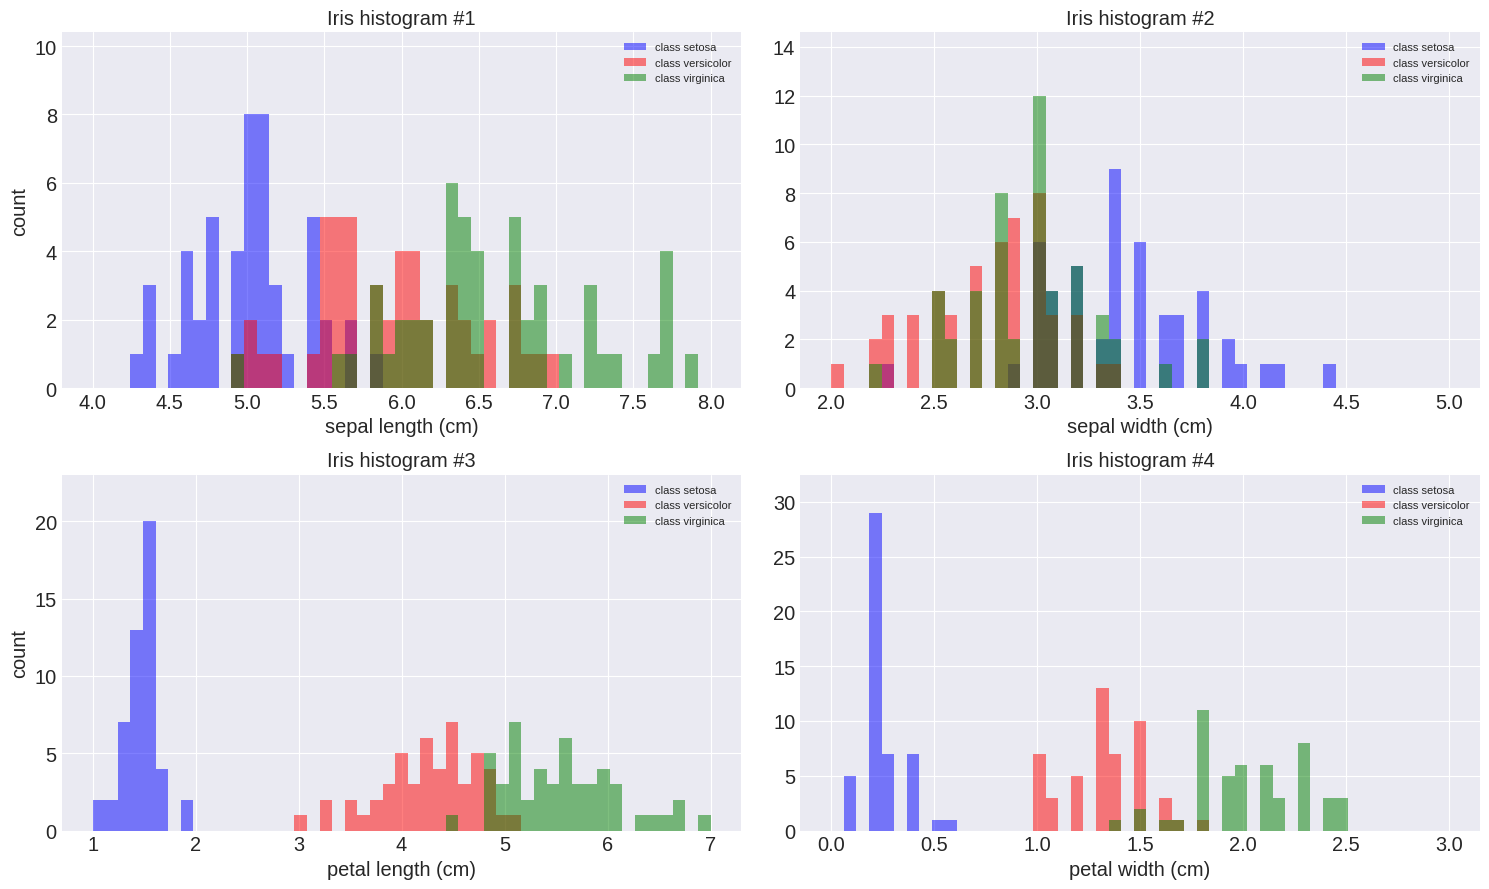

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,9))

for ax, cnt in zip(axes.ravel(), range(4)):  

    # set bin sizes
    min_b = np.floor(np.min(X[:,cnt]))
    max_b = np.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 50)

    # plotting the histograms
    for label, color in zip(range(0,3), ('blue', 'red', 'green')):
        ax.hist(X[y==label, cnt],
                   color=color,
                   label=f'class {class_names[label]}',
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(col_names[cnt])
    ax.set_title('Iris histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()       

plt.show()

In [30]:
U, S, VT = scipy.linalg.svd(X)
U.shape, S.shape, VT.shape

((150, 150), (4,), (4, 4))

In [31]:
VT

array([[-0.75110816, -0.38008617, -0.51300886, -0.16790754],
       [ 0.2841749 ,  0.5467445 , -0.70866455, -0.34367081],
       [ 0.50215472, -0.67524332, -0.05916621, -0.53701625],
       [ 0.32081425, -0.31725607, -0.48074507,  0.75187165]])

We can easily keep Two features and ignore the rest.

In [32]:
# Reduce dimensionality using the first two components of Vt

k = 2

Uk = U[:, :-k]
Sk = S[:-k]
VTk = VT[:-k, :]

print (S.sum(), Sk.sum(), Sk.sum()/ S.sum())

119.0667047655981 113.72094752929308 0.9551028371295821


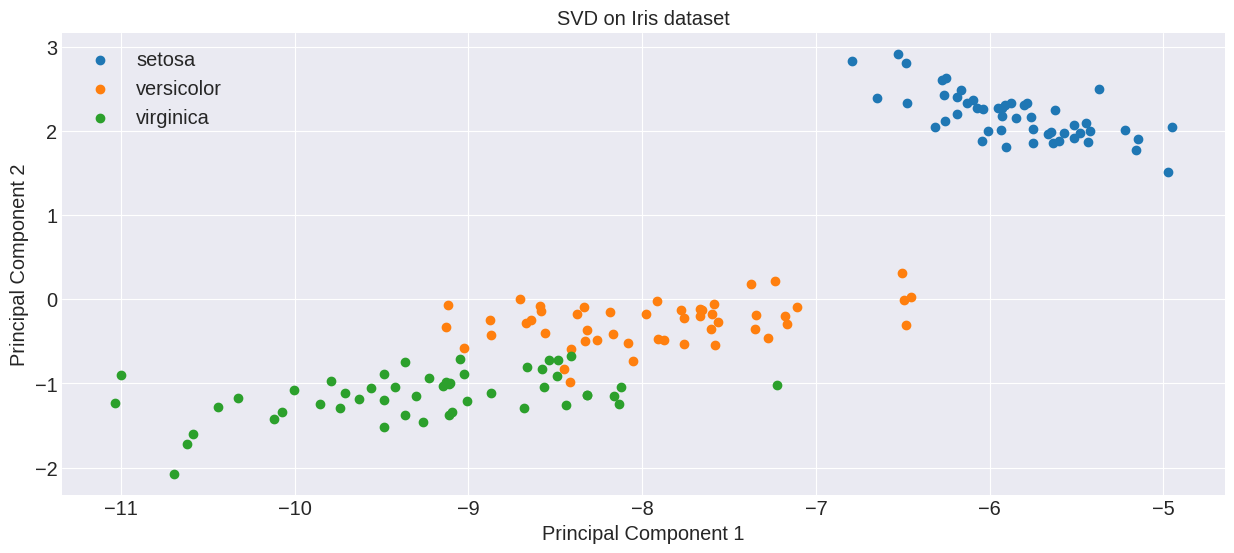

In [33]:
X_reduced = X.dot(VTk.T)

# Plot the reduced data
plt.figure()
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVD on Iris dataset')
plt.legend()
plt.grid(True)
plt.show()


## Linear Discriminant Analysis (LDA)

LDA is like PCA, but it focuses on maximizing the separability among known categories.

We can project the data on x-axis and completely ignore the y axis value. But that would not be a good use of the information available.

Lets find a line through the X-Y Graph and get maximum separability of classes. 
**Note:** PCA completely ignores the class labels, But LDA takes classes into consideration.

<img src='../../../images/ml_nb_s07_fig1.png'>

explained variance ratio (first two components): [0.92461872 0.05306648]


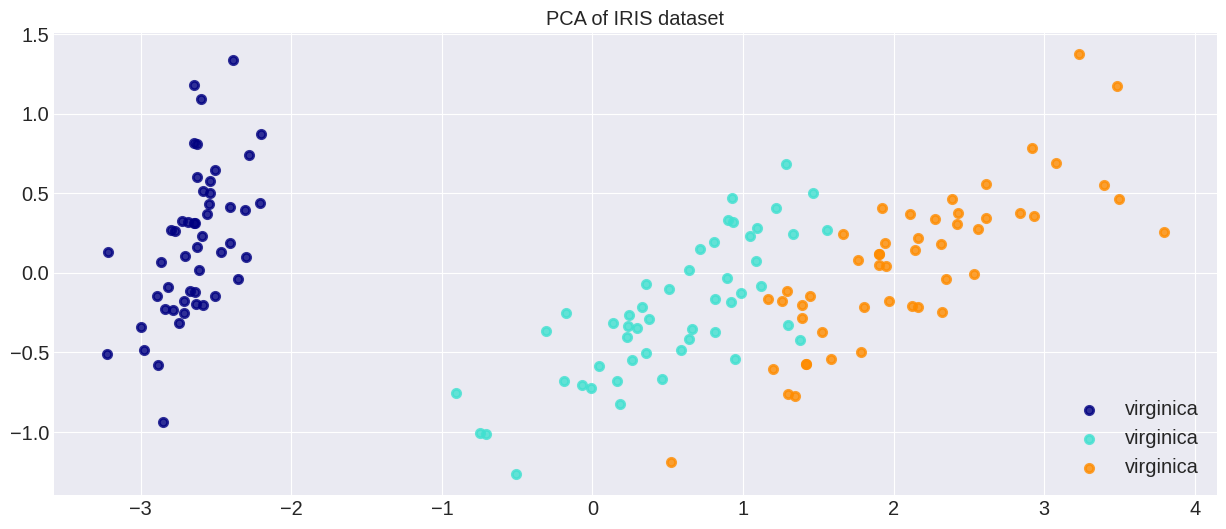

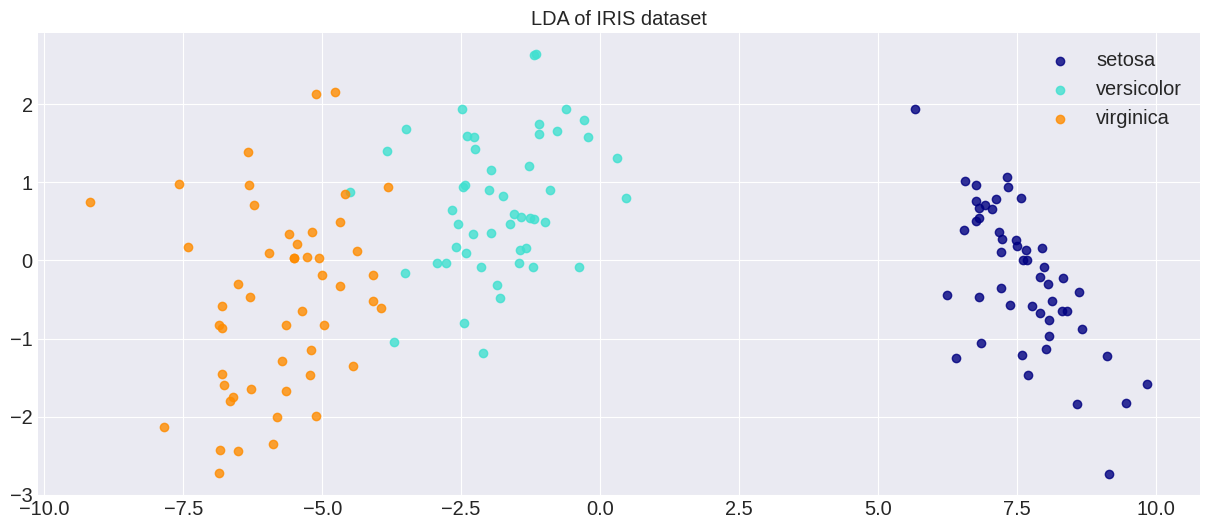

In [34]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, class_name in zip(colors, [0, 1, 2], class_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, class_name in zip(colors, [0, 1, 2], class_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=class_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()


## [Summarizing the LDA approach](https://sebastianraschka.com/Articles/2014_python_lda.html)

General steps for performing a linear discriminant analysis; we will explore them in more detail in the following sections.

1. Compute the d -dimensional mean vectors for the different classes from the dataset.
2. Compute the scatter matrices (in-between-class and within-class scatter matrix).
3. Compute the eigenvectors ($e_1,e_2,...,e_d$) and corresponding eigenvalues ($\lambda_1,\lambda_2,...,\lambda_d$) for the scatter matrices.
4. Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d x k dimensional matrix W (where every column represents an eigenvector).
5. Use this d x k eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the matrix multiplication: Y =X x W (where X  is a n x d-dimensional matrix representing the n samples, and y  are the transformed n x k-dimensional samples in the new subspace).

### Step 1: Computing the d-dimensional mean vectors

In [35]:
mean_vectors = []

for label in range(0,3):
    
    mean_vectors.append(np.mean(X[y==label], axis=0))
    
    print(f'Mean Vector class {label}: {mean_vectors[label]}')

Mean Vector class 0: [5.006 3.428 1.462 0.246]
Mean Vector class 1: [5.936 2.77  4.26  1.326]
Mean Vector class 2: [6.588 2.974 5.552 2.026]


### Step 2: Computing the Scatter Matrices 
Compute the two 4 x 4-dimensional matrices: The within-class and the between-class scatter matrix.

#### 2.1 Within-class scatter matrix $S_W$

$S_W$ is computed by the following equation:
$S_W = \sum_{i=1}^c S_i$

where $S_i=\sum_{x∈D_i}^n (x − m_i)\circ (x  − m_i)^T$ (scatter matrix for every class)

and $m_i$ is the mean vector
$m_i=\frac{1}{n_i}\sum_{x∈D_i}^n x_k$

In [36]:
S_W = np.zeros((4,4))

for label, mv in zip(range(0,3), mean_vectors):
    
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    
    for row in X[y == label]:
        
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        
        class_sc_mat += (row-mv).dot((row-mv).T)
    
    S_W += class_sc_mat                             # sum class scatter matrices

print('within-class Scatter Matrix:\n', S_W)


within-class Scatter Matrix:
 [[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]


#### 2.2 Between-class scatter matrix $S_B$

The between-class scatter matrix $S_B$ is computed by the following equation:
$S_B=\sum_{i=1}^c N_i ( m_i - m)(m_i - m)^T$

where $m$ is the overall mean, and $m_i$ and $N_i$ are the sample mean and sizes of the respective classes.

In [37]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))

for i,mean_vec in enumerate(mean_vectors):  
    
    n = X[ y == i ,:].shape[0]
    
    mean_vec = mean_vec.reshape(4,1) # make column vector
    
    overall_mean = overall_mean.reshape(4,1) # make column vector
    
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('Between-class Scatter Matrix:\n', S_B)


Between-class Scatter Matrix:
 [[ 63.21213333 -19.95266667 165.2484      71.27933333]
 [-19.95266667  11.34493333 -57.2396     -22.93266667]
 [165.2484     -57.2396     437.1028     186.774     ]
 [ 71.27933333 -22.93266667 186.774       80.41333333]]


#### Step 3: Solving the generalized eigenvalue problem 

Next, we will solve the generalized eigenvalue problem for the matrix $S_W^{−1} \circ S_B$ to obtain the linear discriminants

In [38]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))



Eigenvector 1: 
[[-0.20874182]
 [-0.38620369]
 [ 0.55401172]
 [ 0.7073504 ]]
Eigenvalue 1: 3.22e+01

Eigenvector 2: 
[[-0.00653196]
 [-0.58661055]
 [ 0.25256154]
 [-0.76945309]]
Eigenvalue 2: 2.85e-01

Eigenvector 3: 
[[-0.14156417]
 [-0.212536  ]
 [-0.27030318]
 [ 0.69269842]]
Eigenvalue 3: -2.89e-15

Eigenvector 4: 
[[-0.14156417]
 [-0.212536  ]
 [-0.27030318]
 [ 0.69269842]]
Eigenvalue 4: -2.89e-15


#### Checking the eigenvector-eigenvalue calculation

A quick check that the eigenvector-eigenvalue calculation is correct and satisfy the equation:
Av = λ  v

where
A =$S_W^{−1} S_B$

v=Eigenvector

λ=Eigenvalue

In [39]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')


ok


### Step 4: Selecting linear discriminants for the new feature subspace
Reminder: we want to project the data into a subspace that improves the class separability, and also reduces the dimensionality of our feature space, (where the eigenvectors will form the axes of this new feature subspace).

In [40]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])
# Note :
#  In LDA, the number of linear discriminants is at most c−1 
#  where c is the number of class labels, since the in-between 
#  scatter matrix SB is the sum of c matrices with rank 1 or less.

Eigenvalues in decreasing order:

32.191929198278025
0.28539104262306647
3.7355530009793716e-15
3.7355530009793716e-15


In [41]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 99.12%
eigenvalue 2: 0.88%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


### 4.2. Choosing k eigenvectors with the largest eigenvalues

After sorting the eigenpairs by decreasing eigenvalues, it is now time to construct our d x k-dimensional eigenvector matrix WW (here 4×2: based on the 2 most informative eigenpairs) and thereby reducing the initial 4-dimensional feature space into a 2-dimensional feature subspace.

In [42]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[-0.20874182 -0.00653196]
 [-0.38620369 -0.58661055]
 [ 0.55401172  0.25256154]
 [ 0.7073504  -0.76945309]]


### Step 5: Transforming the samples onto the new subspace

In the last step, we use the 4 × 2-dimensional matrix W that we just computed to transform our samples onto the new subspace via the equation Y =X x  W.
(where X is a n x d-dimensional matrix representing the n samples, and Y  are the transformed n x k-dimensional samples in the new subspace).

In [43]:
X_lda = X.dot(W)
assert X_lda.shape == (150,2), "The matrix is not 150x2 dimensional."

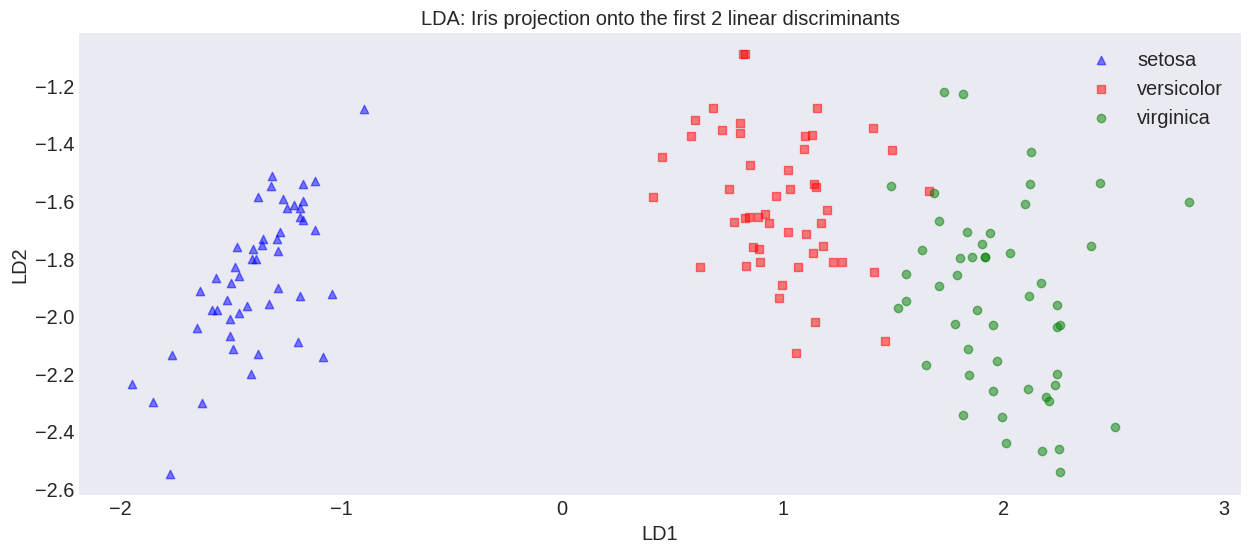

In [44]:
ax = plt.subplot(111)

for label,marker,color in zip(range(3),
                              ('^', 's', 'o'),
                              ('blue', 'red', 'green')):
    
    plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=class_names[label]
                )

plt.xlabel('LD1')
plt.ylabel('LD2')

leg = plt.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.title('LDA: Iris projection onto the first 2 linear discriminants')

plt.grid()
plt.tight_layout
plt.show()


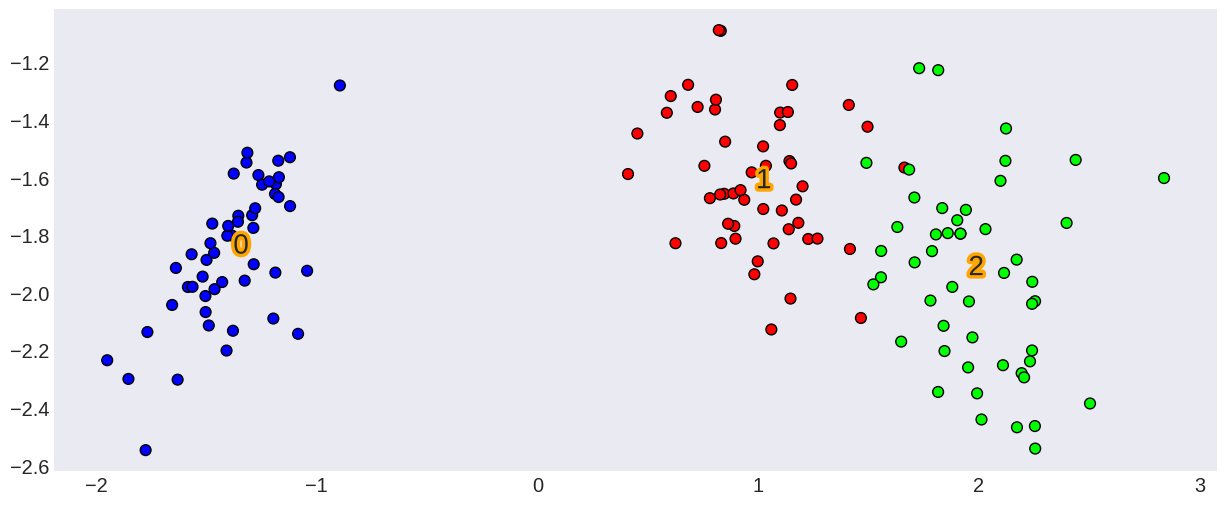

In [45]:
figure, ax = plt.subplots( )
ax.scatter( X_lda.real [ :, 0], X_lda.real [ :, 1], s = 60, 
           c = y, 
           cmap = CMAP, ec = 'k')

for i in np.arange(0,3):
    
    # Position of each label at median of data points.
    
    xtext = np.median(X_lda.real[y == i, 0], axis=0)
    
    ytext = np.median(X_lda.real[y == i, 1], axis=0)
    
    txt = ax.text(xtext, ytext, str(i), fontsize=20)
    
    txt.set_path_effects([
        PathEffects.Stroke(linewidth=5, foreground="Orange"),
        PathEffects.Normal()])
ax.grid()
plt.show()